## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [5]:
# Dataset foi removido do Seaborn. A mensagem de erro possui uma sugestão de como baixar os dados diretamente da fonte
# boston = datasets.load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data=np.hstack([raw_df.values[::2, :],raw_df.values[1::2, :3]]),columns=columns)

X = df.drop(columns='MEDV')
y = df['MEDV']

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [9]:
#separou os dados de validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
#treinou a arvore com profundidade 8
tree1 = DecisionTreeRegressor(max_depth = 8)

tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
#calcular as ccp-alfas na base de treinamento
path = tree1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.64971751e-05, 3.01318267e-04, 5.69679849e-04,
        6.92090395e-04, 6.92090395e-04, 9.03954802e-04, 1.05932203e-03,
        1.14406780e-03, 1.38418079e-03, 1.41242938e-03, 2.07627119e-03,
        2.07627119e-03, 2.26082863e-03, 2.38347458e-03, 2.76836158e-03,
        4.08192090e-03, 4.23728814e-03, 4.48305085e-03, 5.12711864e-03,
        5.14830508e-03, 6.22881356e-03, 7.16101695e-03, 7.32203390e-03,
        7.52683616e-03, 7.53295669e-03, 8.47457627e-03, 8.70527307e-03,
        1.48305085e-02, 1.52966102e-02, 1.67810734e-02, 1.93347458e-02,
        1.99343220e-02, 2.10714286e-02, 2.17551789e-02, 2.24152542e-02,
        2.37429379e-02, 2.45213434e-02, 3.13963391e-02, 3.25762712e-02,
        3.62403698e-02, 3.70677966e-02, 4.22950891e-02, 4.80861169e-02,
        5.07231638e-02, 5.15593220e-02, 5.45601291e-02, 5.61051221e-02,
        5.70480417e-02, 6.55521030e-02, 6.55521030e-02, 6.68361582e-02,
        6.69943503e-02, 6.77966102e-02, 7.46046268

Text(0, 0.5, 'Impureza total das folhas')

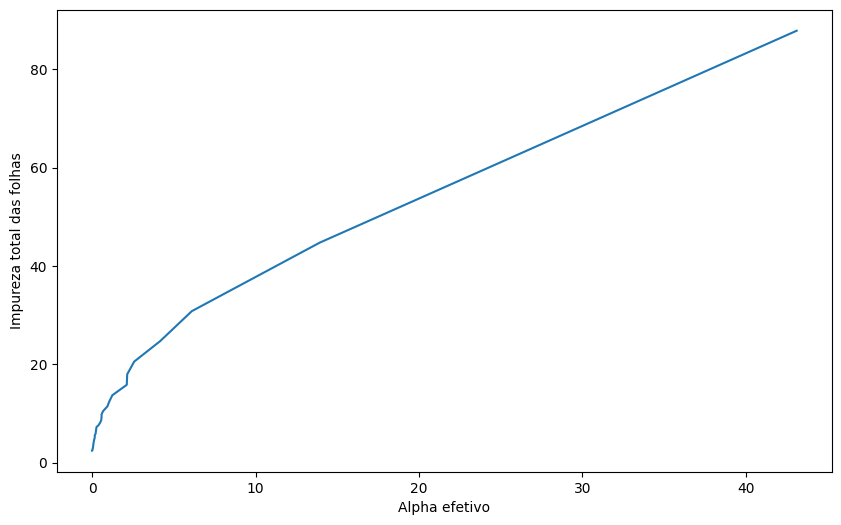

In [19]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [20]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state= 0, ccp_alpha= ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da arvore')

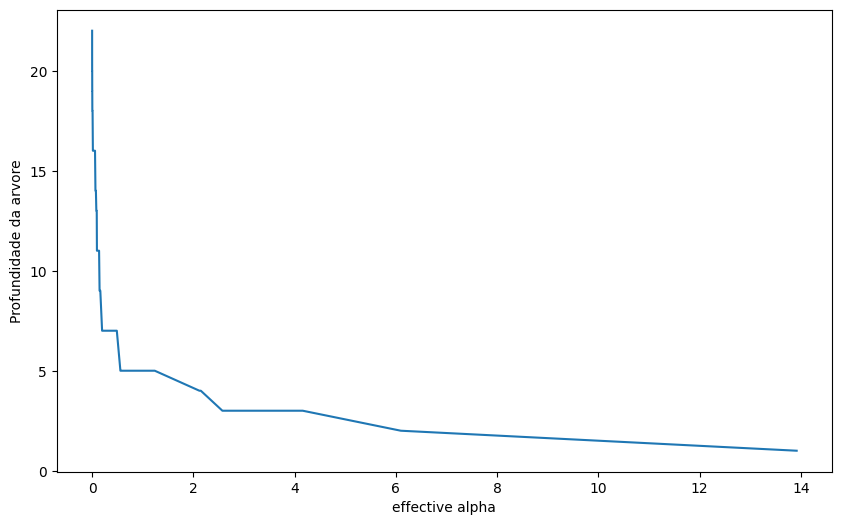

In [22]:
tree_prof = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], tree_prof[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da arvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [29]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

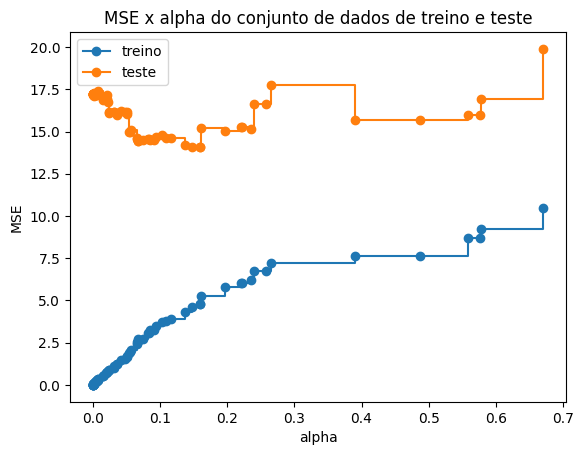

In [41]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-10], train_scores[:-10], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-10], test_scores[:-10], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [44]:
tree_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.15)
tree_final.fit(X_train, y_train)

print(f'Profundidade: {tree_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {tree_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, tree_final.predict(X_test)):.2f}')

Profundidade: 9
R-quadrado na base de testes: 0.81
MSE na base de testes: 14.09


### 7. Visualize esta árvore.

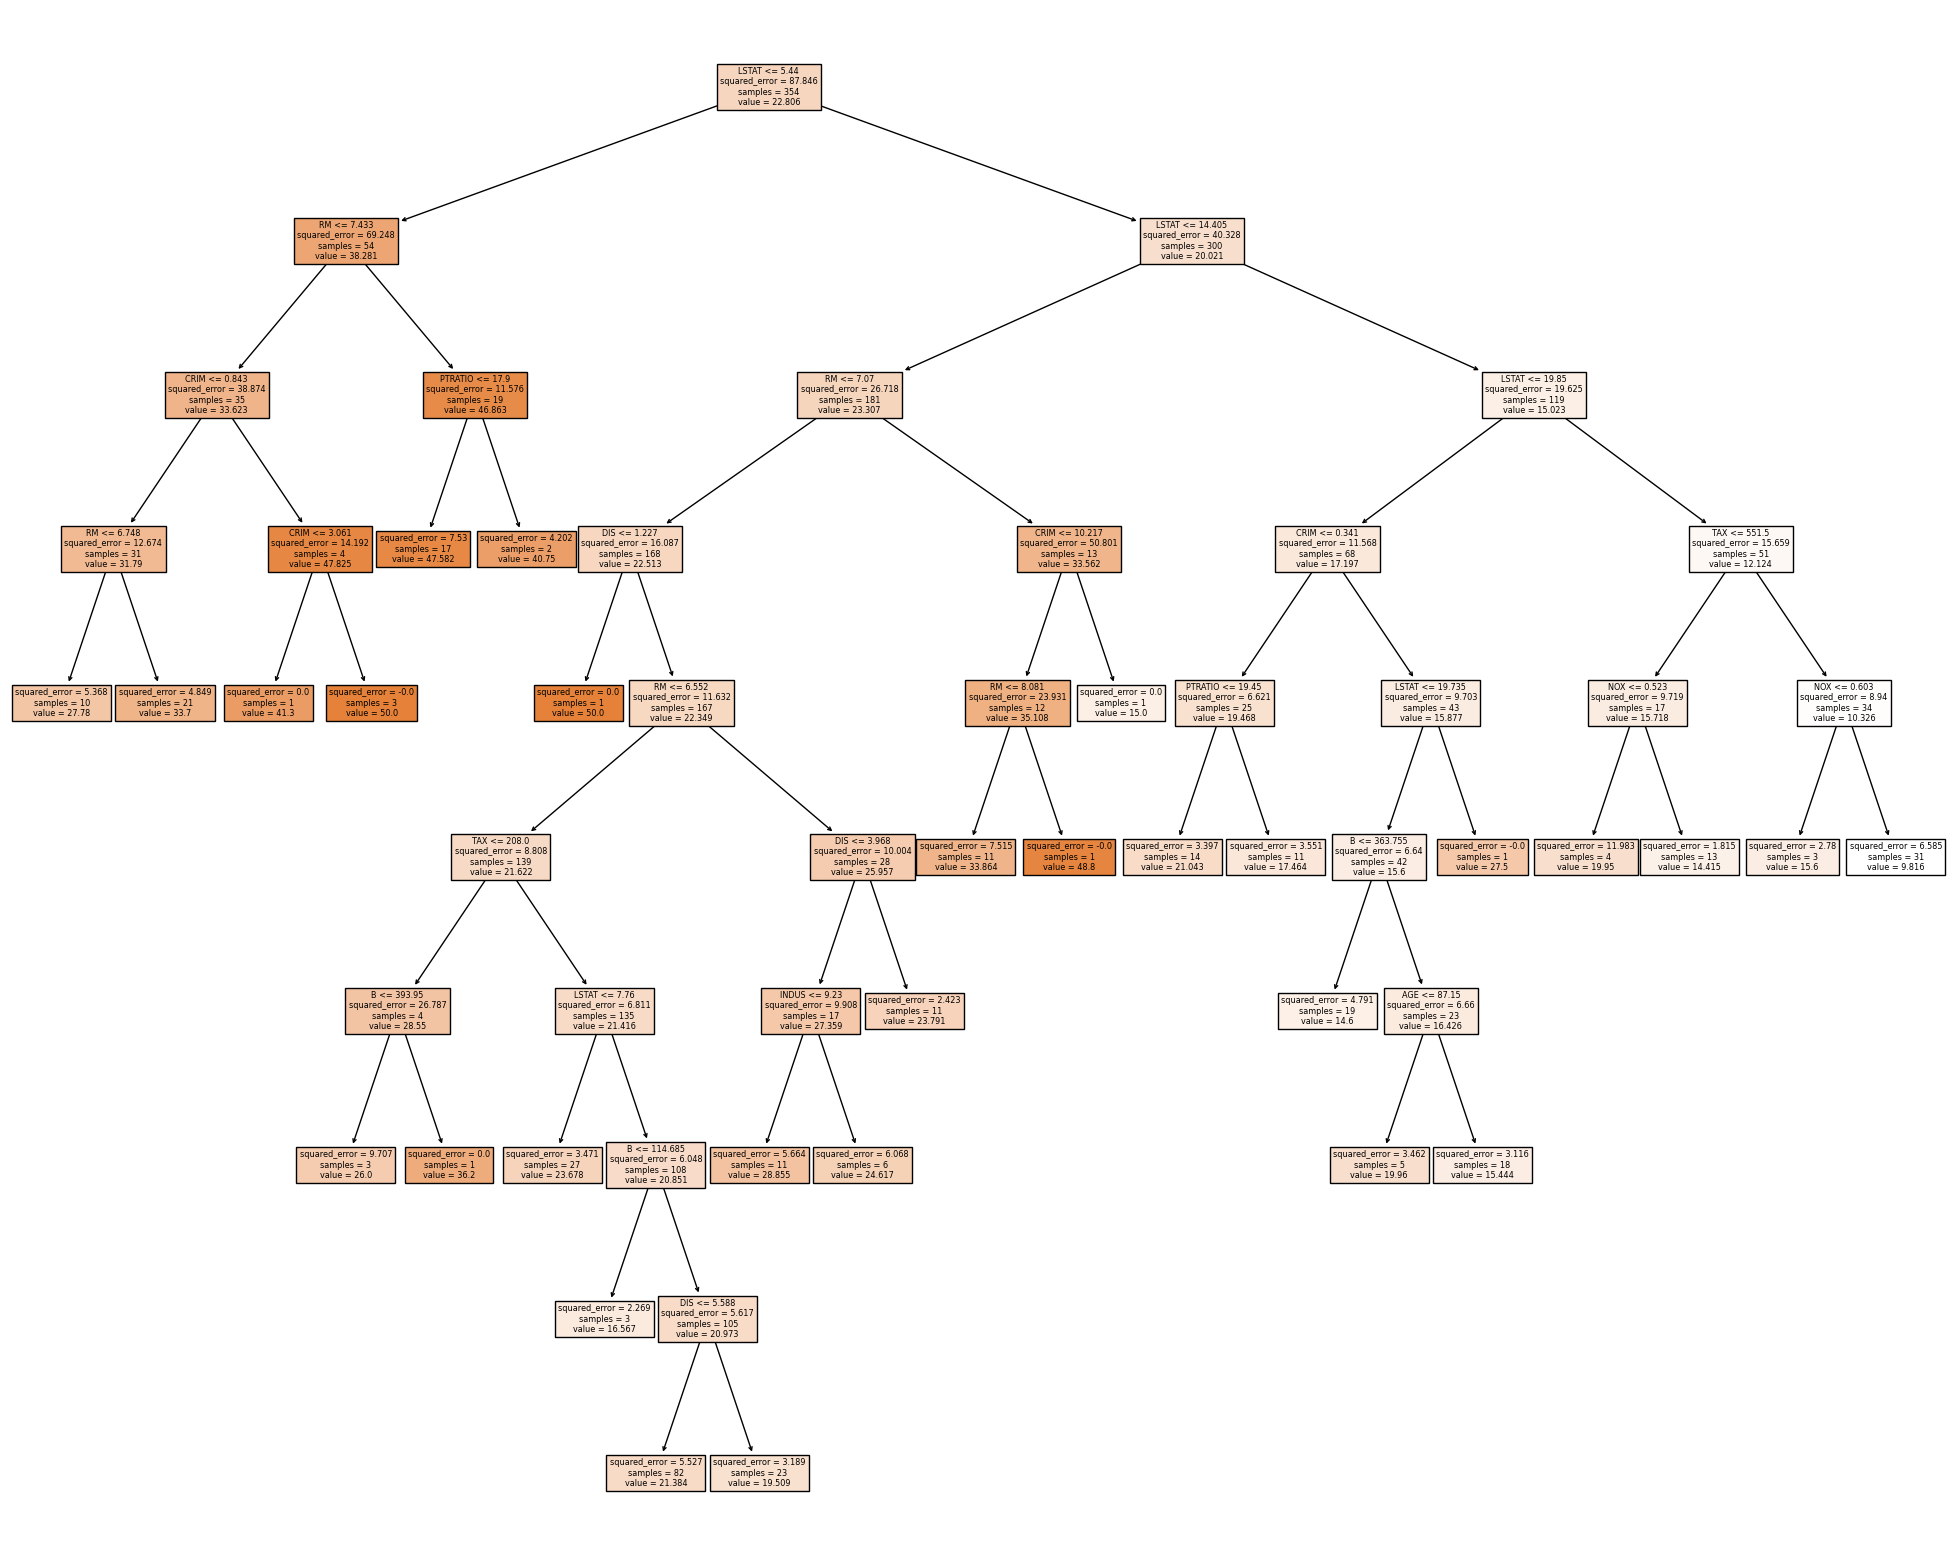

In [47]:
plt.rc('figure', figsize=(25,20))

tree.plot_tree(decision_tree=tree_final,
               feature_names=X.columns,
               filled=True);